# **TikTok Project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

Your TikTok data team is still in the early stages of their latest project. So far, you’ve completed a project proposal and used Python to inspect and organize the TikTok dataset.

Orion Rainier, a Data Scientist at TikTok, is pleased with the work you have already completed and is requesting your assistance with some Exploratory Data Analysis (EDA) and data visualization. The management team asked to see a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help us understand the data. At the very least, include a graph comparing claim counts to opinion counts, as well as boxplots of the most important variables (like “video duration,” “video like count,” “video comment count,” and “video view count”) to check for outliers. Also, include a breakdown of “author ban status” counts.

Additionally, the management team has recently asked all EDA to include Tableau visualizations. Tableau visualizations are particularly helpful in status reports to the client and board members. For this data, create a Tableau dashboard showing a simple claims versus opinions count, as well as stacked bar charts of claims versus opinions for variables like video view counts, video like counts, video share counts, and video download counts. Make sure it is easy to understand to someone who isn’t data savvy, and remember that the assistant director is a person with visual impairments.

You also notice a follow-up email from the Data Science Lead, Willow Jaffey. Willow suggests including an executive summary of your analysis to share with teammates.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 3 End-of-course project: Exploratory data analysis**

In this activity, you will examine data provided and prepare it for analysis. You will also design a professional data visualization that tells a story, and will help data-driven decisions for business needs.

Please note that the Tableau visualization activity is optional, and will not affect your completion of the course. Completing the Tableau activity will help you practice planning out and plotting a data visualization based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. Your mission is to continue the investigation you began in C2 and perform further EDA on this data with the aim of learning more about the variables. Of particular interest is information related to what distinguishes claim videos from opinion videos.

**The goal** is to explore the dataset and create visualizations.
<br/>
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Build visualizations

**Part 4:** Evaluate and share results

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.

# **Visualize a story in Tableau and Python**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document and those below where applicable to craft your response:
1. Identify any outliers:


*   What methods are best for identifying outliers?  
**Answer**  
Use .info() then check the mean, median, min, and max for outliers. Boxplots are great for visualization because outliers are outside the whiskers.  


*   How do you make the decision to keep or exclude outliers from any future models?  
**Answer**  
It really depends on the situation because they're on a case-by-case basis. We can do the following:
- Keep as is: if we're only doing EDA and nothing else, the machine learning algorithm doesn't require removal
- Delete: if we know for a fact that they are genuine mistakes like typos and the data will be used in machine learning that require does not handle them well
- Modify: if the dataset is small then we may have to reassign the values with the mean/median or outlier limit value

* Use the describe() method to check the statistics.  We can look at min/max against the mean and median.

* It depends on what the data is while looking at the values.  We can delete, keep, or assign new values to them.  Choosing any of the 3 is done on a case-by-case basis.

### **Task 1. Imports, links, and loading**
Go to Tableau Public
The following link will help you complete this activity. Keep Tableau Public open as you proceed to the next steps.

Link to supporting materials:
Public Tableau: https://public.tableau.com/s/. Note that the TikTok dataset can be downloaded directly from this notebook by going to "Lab Files" in the menu bar at the top of the page, clicking into the "/home/jovyan/work" folder, selecting `tiktok_dataset.csv`, and clicking "Download" above the list of files. 

For EDA of the data, import the packages that would be most helpful, such as `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn`.


In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

Then, load the dataset into a dataframe. Read in the data and store it as a dataframe object.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.


In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document and those below where applicable to complete your code.

### **Task 2a: Data exploration and cleaning**

The first step is to assess your data. Check the Data Source page on Tableau Public to get a sense of the size, shape and makeup of the data set.

Consider functions that help you understand and structure the data.

*    `.head()`
*    `.info()`
*    `.describe()`
*    `.groupby()`
*    `.sort_values()`

Consider the following questions as you work:

What do you do about missing data (if any)?

Are there data outliers?

Start by discovering, using `.head()`, `.size`, and `.shape`.

In [3]:
# Display and examine the first few rows of the dataframe
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
# Get the size of the data
data.size

232584

In [5]:
# Get the shape of the data
data.shape

(19382, 12)

Get basic information about the data, using `.info()`.

In [6]:
# Get basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate a table of descriptive statistics, using `.describe()`.

In [7]:
# Generate a table of descriptive statistics
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


### **Task 2b. Assess data types**

In Tableau, staying on the data source page, double check the data types of the columns in the dataset. Refer to the dimensions and measures in Tableau.


Review the instructions linked in the previous Activity document to create the required Tableau visualization.

### **Task 2c. Select visualization type(s)**

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the TikTok dataset. What type of data visualization(s) would be most helpful? Consider the distribution of the data.

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map


**Answer:**  
Pie chart can be used to show proportion of claim and opinion tickets.  
Box plots are good for finding outliers in a dataset.  
Bar chart could be used for showing the breakdown of author ban status.

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3. Build visualizations**

Now that you have assessed your data, it’s time to plot your visualization(s).

#### **video_duration_sec**

Create a box plot to examine the spread of values in the `video_duration_sec` column.

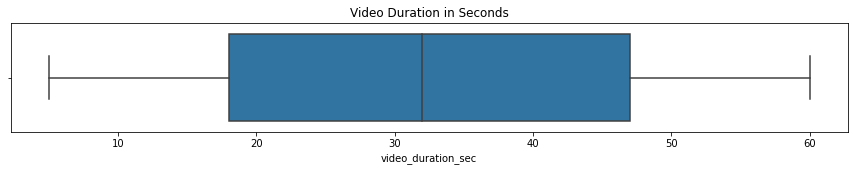

In [8]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(15, 2))
sns.boxplot(data['video_duration_sec'])
plt.title('Video Duration in Seconds')
plt.show()

Create a histogram of the values in the `video_duration_sec` column to further explore the distribution of this variable.

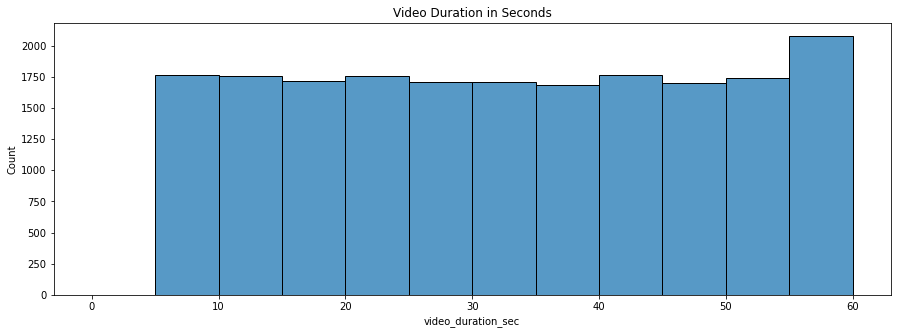

In [9]:
# Create a histogram
plt.figure(figsize=(15, 5))
sns.histplot(data['video_duration_sec'], bins=range(0, 61, 5))
plt.title('Video Duration in Seconds')
plt.show()

**Question:** What do you notice about the duration and distribution of the videos?

**Answer:** The videos are between 5 and 60 seconds. The distribution is uniform with the exception of higher count for videos that are 55-60 seconds.

#### **video_view_count**

Create a box plot to examine the spread of values in the `video_view_count` column.

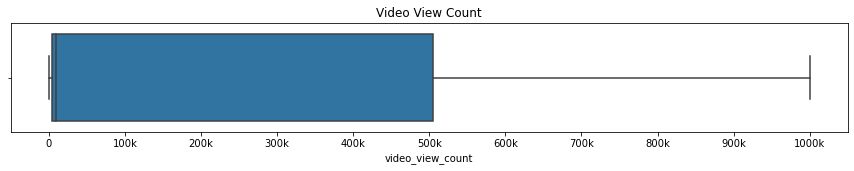

In [10]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(15, 2))
vvc = sns.boxplot(data['video_view_count'])
plt.title('Video View Count')
labels = [0] + [str(i) + 'k' for i in range(100, 1001, 100)]
vvc.set_xticks(range(0, 1000001, 100000))
vvc.set_xticklabels(labels=labels)
plt.show()

Create a histogram of the values in the `video_view_count` column to further explore the distribution of this variable.

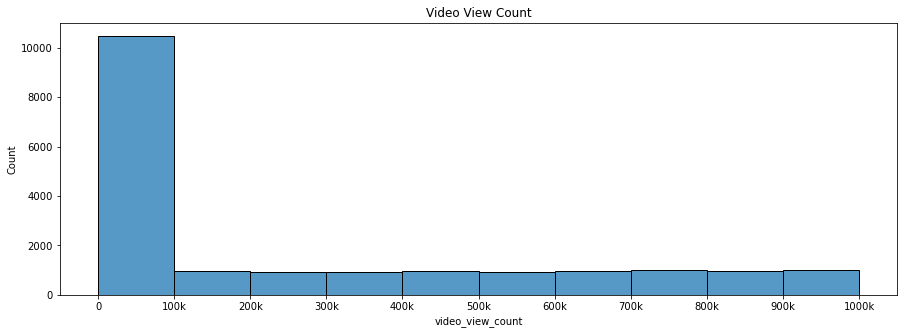

In [11]:
# Create a histogram
plt.figure(figsize=(15, 5))
vvc = sns.histplot(data['video_view_count'], bins=range(0, 1000001, 100000))
plt.title('Video View Count')
labels = [0] + [str(i) + 'k' for i in range(100, 1001, 100)]
vvc.set_xticks(range(0, 1000001, 100000))
vvc.set_xticklabels(labels=labels)
plt.show()

**Question:** What do you notice about the distribution of this variable?

**Answer:** The data is not evenly distributed. Videos with less than 100,000 views account for the majority of the videos while videos with greater than 100,000 views is around 10,000 videoes each, respectively.

#### **video_like_count**

Create a box plot to examine the spread of values in the `video_like_count` column.

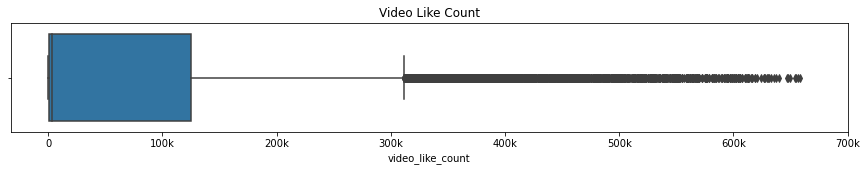

In [12]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(15, 2))
vlc = sns.boxplot(data['video_like_count'])
plt.title('Video Like Count')
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
vlc.set_xticks(range(0, 700001, 100000))
vlc.set_xticklabels(labels=labels)
plt.show()

Create a histogram of the values in the `video_like_count` column to further explore the distribution of this variable.

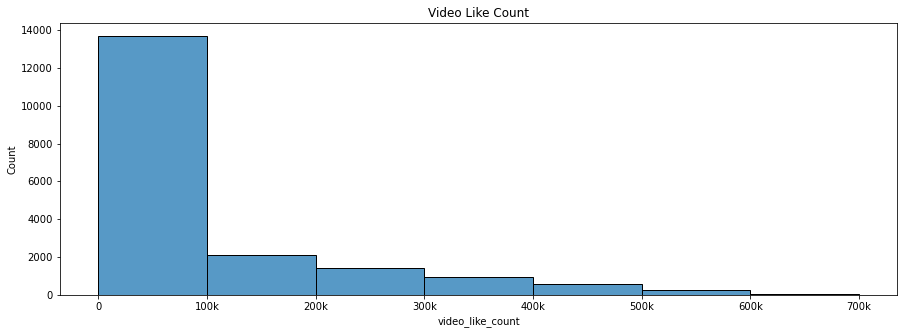

In [13]:
# Create a histogram
plt.figure(figsize=(15, 5))
vlc = sns.histplot(data['video_like_count'], bins=range(0, 700001, 100000))
plt.title('Video Like Count')
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
vlc.set_xticks(range(0, 700001, 100000))
vlc.set_xticklabels(labels=labels)
plt.show()

**Question:** What do you notice about the distribution of this variable?

**Answer:** There are about 14k videos with 100k likes or below. The rest of the bars get lower and lower as the like count reaches 700k signaling the data being right-skewed.

#### **video_comment_count**

Create a box plot to examine the spread of values in the `video_comment_count` column.

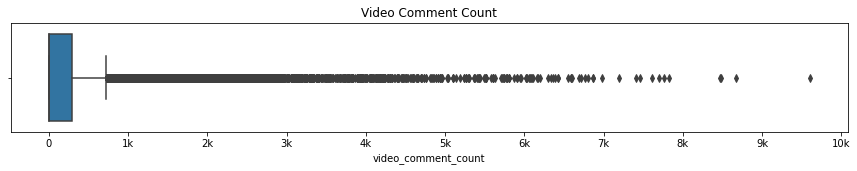

In [14]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(15, 2))
vcc = sns.boxplot(data['video_comment_count'])
plt.title('Video Comment Count')
labels = [0] + [str(i) + 'k' for i in range(1, 11, 1)]
vcc.set_xticks(range(0, 10001, 1000))
vcc.set_xticklabels(labels=labels)
plt.show()

Create a histogram of the values in the `video_comment_count` column to further explore the distribution of this variable.

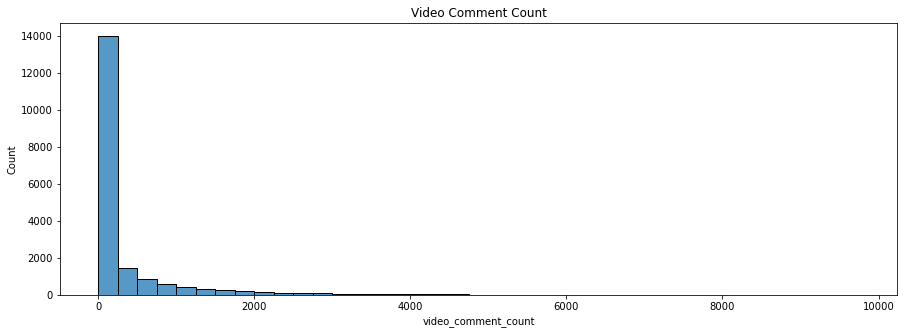

In [15]:
# Create a histogram
plt.figure(figsize=(15, 5))
vcc = sns.histplot(data['video_comment_count'], bins=range(0, 10000, 250))
plt.title('Video Comment Count')
#labels = [0] + [str(i) + 'k' for i in range(1, 11, 1)]
#print(labels)
#vcc.set_xticks(range(0, 10001, 1000))
#vcc.set_xticklabels(labels=labels)
plt.show()

**Question:** What do you notice about the distribution of this variable?

**Answer:** Most videos have less than 250 comments and the distribution is right-skewed.

#### **video_share_count**

Create a box plot to examine the spread of values in the `video_share_count` column.

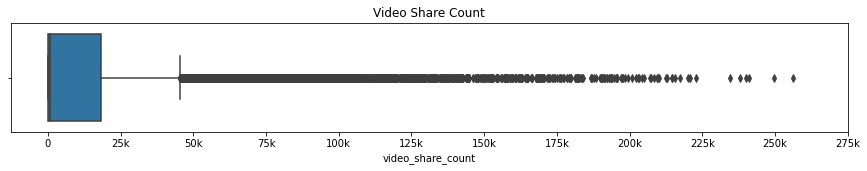

In [16]:
# Create a boxplot to visualize distribution of `video_share_count`
plt.figure(figsize=(15, 2))
vsc = sns.boxplot(data['video_share_count'])
plt.title('Video Share Count')
labels = [0] + [str(i) + 'k' for i in range(25, 276, 25)]
vsc.set_xticks(range(0, 275001, 25000))
vsc.set_xticklabels(labels=labels)
plt.show()

*Create* a histogram of the values in the `video_share_count` column to further explore the distribution of this variable.

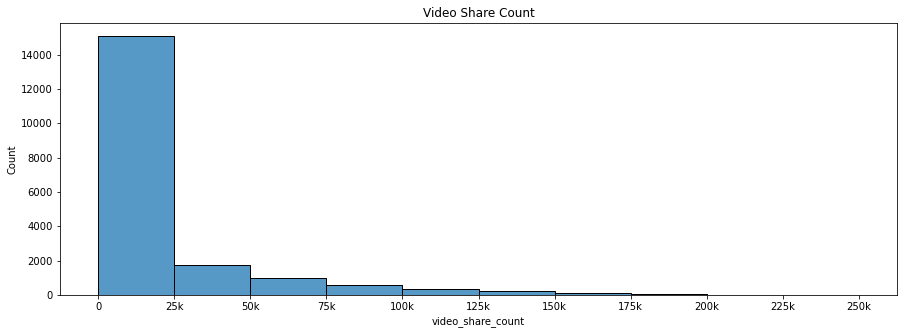

In [17]:
# Create a histogram
plt.figure(figsize=(15, 5))
vsc = sns.histplot(data['video_share_count'], bins=range(0, 260000, 25000))
plt.title('Video Share Count')
labels = [0] + [str(i) + 'k' for i in range(25, 260, 25)]
vsc.set_xticks(range(0, 260000, 25000))
vsc.set_xticklabels(labels=labels)
plt.show()

**Question:** What do you notice about the distribution of this variable?

**Answer:** High share count videos range from 0 to 25k. The rest of the videos have 2k share count or below. The distribution is right-skewed.

#### **video_download_count**

Create a box plot to examine the spread of values in the `video_download_count` column.

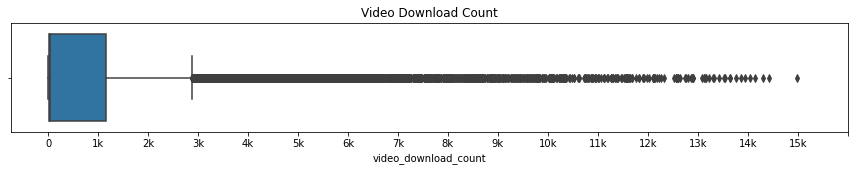

In [18]:
# Create a boxplot to visualize distribution of `video_download_count`
plt.figure(figsize=(15, 2))
vdc = sns.boxplot(data['video_download_count'])
plt.title('Video Download Count')
labels = [0] + [str(i) + 'k' for i in range(1, 16, 1)]
#print(labels)
vdc.set_xticks(range(0, 16001, 1000))
vdc.set_xticklabels(labels=labels)
plt.show()

Create a histogram of the values in the `video_download_count` column to further explore the distribution of this variable.

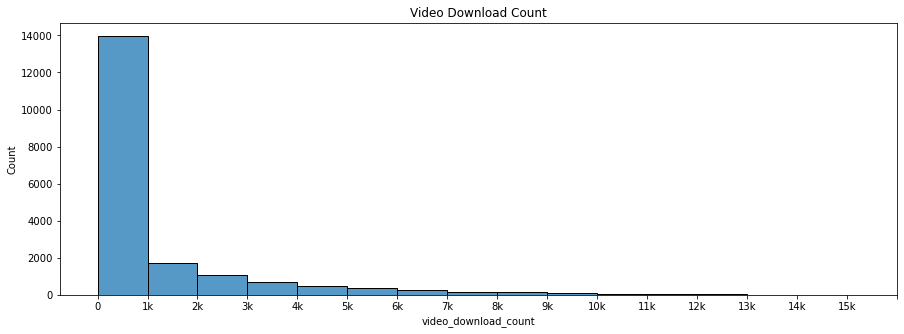

In [19]:
# Create a histogram
plt.figure(figsize=(15, 5))
vdc = sns.histplot(data['video_download_count'], bins=range(0, 16000, 1000))
plt.title('Video Download Count')
labels = [0] + [str(i) + 'k' for i in range(1, 16, 1)]
vdc.set_xticks(range(0, 16001, 1000))
vdc.set_xticklabels(labels= labels)
plt.show()

**Question:** What do you notice about the distribution of this variable?

**Answer:** The majority of the videos were downloaded less than 1000 times. The distribution is right-skewed.

#### **Claim status by verification status**

Now, create a histogram with four bars: one for each combination of claim status and verification status.

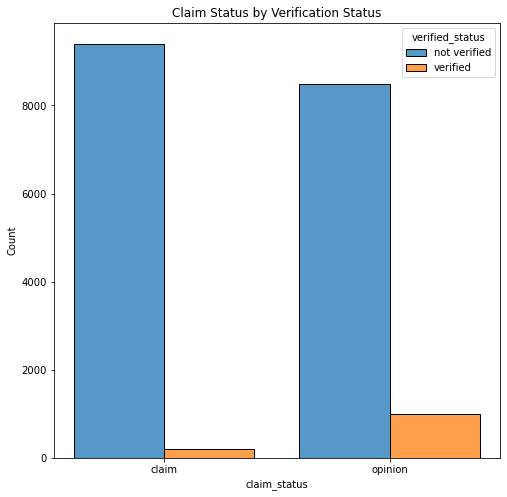

In [20]:
# Create a histogram
plt.figure(figsize=(8, 8))
ver = sns.histplot(
    data,
    x = 'claim_status',
    hue = 'verified_status',
    multiple = 'dodge',
    shrink = 0.8
    )
plt.title('Claim Status by Verification Status')
plt.show()


**Question:** What do you notice about the number of verified users compared to unverified? And how does that affect their likelihood to post opinions?

**Answer:** There are many more unverified users than verified. However, verified users post more opinions than claims.

#### **Claim status by author ban status**

The previous course used a `groupby()` statement to examine the count of each claim status for each author ban status. Now, use a histogram to communicate the same information.

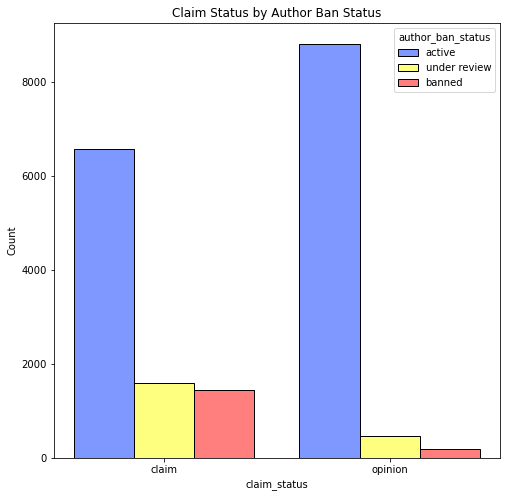

In [21]:
# Create a histogram
plt.figure(figsize=(8, 8))
ver = sns.histplot(
    data,
    x = 'claim_status',
    hue = 'author_ban_status',
    hue_order = ['active', 'under review', 'banned'],
    palette = {'active':'#0033ff', 'under review':'yellow', 'banned':'#ff0000'},
    alpha = 0.5,
    multiple = 'dodge',
    shrink = 0.8
    )
plt.title('Claim Status by Author Ban Status')
plt.show()


**Question:** What do you notice about the number of active authors compared to banned authors for both claims and opinions?

**Answer:** Active authors count for both claim and opinion are much higher than banned authors and authors under review. Active authors with opinion videos have a much higher proportion than authors under review or banned.

#### **Median view counts by ban status**

Create a bar plot with three bars: one for each author ban status. The height of each bar should correspond with the median number of views for all videos with that author ban status.

  author_ban_status        #      video_id  video_duration_sec  \
0            active  10966.0  5.624036e+09                33.0   
1            banned   5304.0  5.563176e+09                32.0   
2      under review   6175.5  5.607722e+09                31.0   

   video_view_count  video_like_count  video_share_count  \
0            8616.0            2222.0              437.0   
1          448201.0          105573.0            14468.0   
2          365245.5           71204.5             9444.0   

   video_download_count  video_comment_count  
0                  28.0                  5.0  
1                 892.0                209.0  
2                 610.5                136.5  


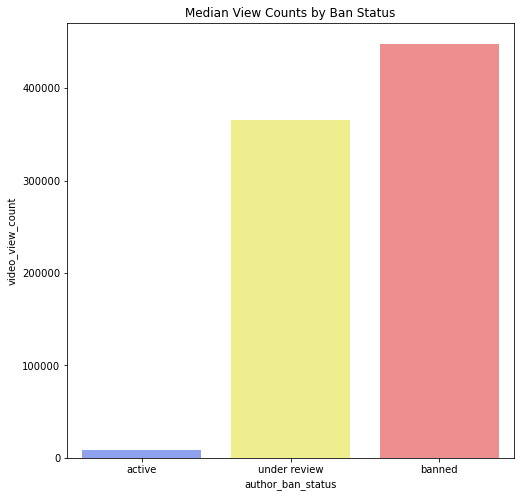

In [22]:
# Create a bar plot
ban_status_median = data.groupby(['author_ban_status']).median(numeric_only=True).reset_index()

print(ban_status_median)

plt.figure(figsize=(8, 8))
mvc = sns.barplot(
    data = ban_status_median,
    x = 'author_ban_status',
    y = 'video_view_count',
    order = ['active', 'under review', 'banned'],
    palette={'active':'#0033ff', 'under review':'yellow', 'banned':'#ff0000'},
    alpha = 0.5
    )
plt.title('Median View Counts by Ban Status')

plt.show()

**Question:** What do you notice about the median view counts for non-active authors compared to that of active authors? Based on that insight, what variable might be a good indicator of claim status?

**Answer:** The median view count for non-active authors (under review and banned) is significantly higher than active authors. 

Unverified authors post many claims
Non-active authors (under review and banned) post more claims
Non-active authors have significantly higher median video view counts

We could probably use video_view_count as an indicator of claim status.

In [23]:
# Calculate the median view count for claim status.
claim_status_median = data.groupby(['claim_status']).median(numeric_only=True).reset_index()

In [24]:
claim_status_median[['claim_status', 'video_view_count']]

,claim_status,video_view_count
0,claim,501555.0
1,opinion,4953.0


#### **Total views by claim status**

Create a pie graph that depicts the proportions of total views for claim videos and total views for opinion videos.

  claim_status  video_view_count
0        claim      4.813891e+09
1      opinion      4.696715e+07


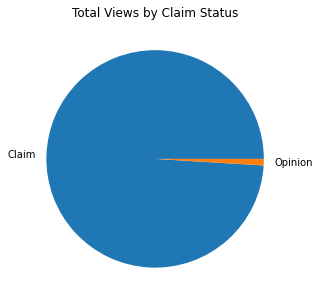

In [25]:
# Create a pie graph
claim_status_views = data.groupby(['claim_status'])['video_view_count'].sum(numeric_only=True).reset_index()

print(claim_status_views)

plt.figure(figsize=(5, 5))
plt.pie(claim_status_views['video_view_count'], labels=['Claim', 'Opinion'])
plt.title('Total Views by Claim Status')
plt.show()

In [26]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [27]:
claim_status_dist = data['claim_status'].value_counts().to_frame()
claim_status_dist

,claim_status
claim,9608
opinion,9476


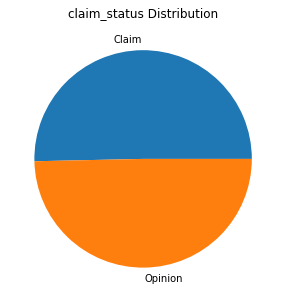

In [28]:
plt.figure(figsize=(5, 5))
plt.pie(claim_status_dist, labels=['Claim', 'Opinion'])
plt.title('claim_status Distribution')
plt.show()

**Question:** What do you notice about the overall view count for claim status?

**Answer:** Almost all video views is for claim videos even though the number of videos for claims and opinions is almost a 50/50 split.

### **Task 4. Determine outliers**

When building predictive models, the presence of outliers can be problematic. For example, if you were trying to predict the view count of a particular video, videos with extremely high view counts might introduce bias to a model. Also, some outliers might indicate problems with how data was captured or recorded.

The ultimate objective of the TikTok project is to build a model that predicts whether a video is a claim or opinion. The analysis you've performed indicates that a video's engagement level is strongly correlated with its claim status. There's no reason to believe that any of the values in the TikTok data are erroneously captured, and they align with expectation of how social media works: a very small proportion of videos get super high engagement levels. That's the nature of viral content.

Nonetheless, it's good practice to get a sense of just how many of your data points could be considered outliers. The definition of an outlier can change based on the details of your project, and it helps to have domain expertise to decide a threshold. You've learned that a common way to determine outliers in a normal distribution is to calculate the interquartile range (IQR) and set a threshold that is 1.5 * IQR above the 3rd quartile.

In this TikTok dataset, the values for the count variables are not normally distributed. They are heavily skewed to the right. One way of modifying the outlier threshold is by calculating the **median** value for each variable and then adding 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if you used the 3rd quartile.

Write a for loop that iterates over the column names of each count variable. For each iteration:
1. Calculate the IQR of the column
2. Calculate the median of the column
3. Calculate the outlier threshold (median + 1.5 * IQR)
4. Calculate the numer of videos with a count in that column that exceeds the outlier threshold
5. Print "Number of outliers, {column name}: {outlier count}"

```
Example:
Number of outliers, video_view_count: ___
Number of outliers, video_like_count: ___
Number of outliers, video_share_count: ___
Number of outliers, video_download_count: ___
Number of outliers, video_comment_count: ___
```

In [29]:
video_categories = [
    'video_view_count',
    'video_like_count',
    'video_share_count',
    'video_download_count',
    'video_comment_count'
    ]

for column in video_categories:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    median = data[column].median()
    upper_limit = median + (1.5 * iqr)
    lower_limit = median - (1.5 * iqr)

    count_upper_limit = (data[column] > upper_limit).sum()
    count_lower_limit = (data[column] < lower_limit).sum()
    print(f'Number of outliers above upper limit, {column}: {count_upper_limit}')
    print(f'Number of outliers below lower limit, {column}: {count_lower_limit}')
    print()

Number of outliers above upper limit, video_view_count: 2343
Number of outliers below lower limit, video_view_count: 0

Number of outliers above upper limit, video_like_count: 3468
Number of outliers below lower limit, video_like_count: 0

Number of outliers above upper limit, video_share_count: 3732
Number of outliers below lower limit, video_share_count: 0

Number of outliers above upper limit, video_download_count: 3733
Number of outliers below lower limit, video_download_count: 0

Number of outliers above upper limit, video_comment_count: 3882
Number of outliers below lower limit, video_comment_count: 0



#### **Scatterplot**

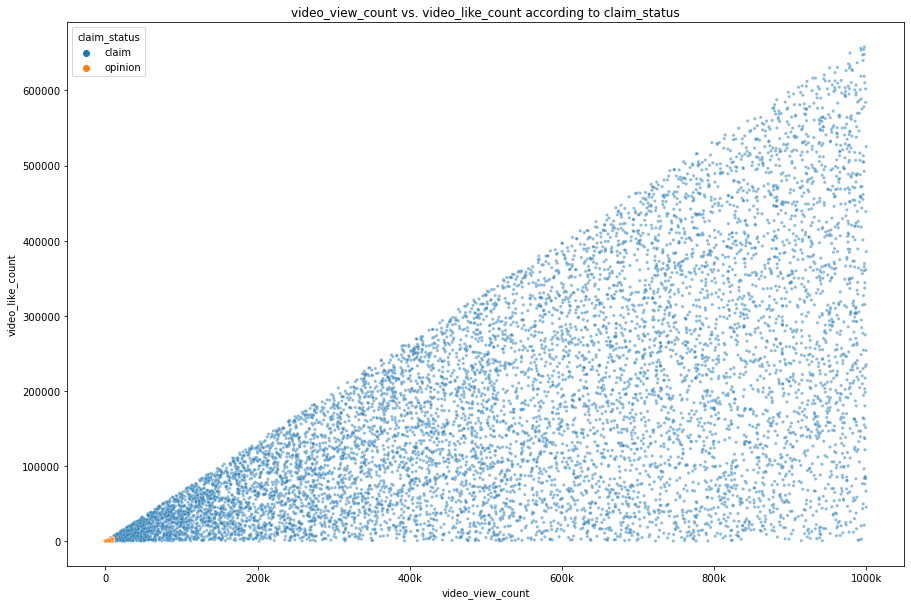

In [30]:
# Create a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
plt.figure(figsize=(15, 10))
vvc_vlc = sns.scatterplot(
    x = data["video_view_count"],
    y = data["video_like_count"],
    hue = data["claim_status"],
    s = 10,
    alpha = 0.5
    )
plt.title('video_view_count vs. video_like_count according to claim_status')
labels = [0] + [str(i) + 'k' for i in range(200, 1001, 200)]
#print(labels)
vvc_vlc.set_xticks(range(0, 1000001, 200000))
vvc_vlc.set_xticklabels(labels=labels)

plt.show()

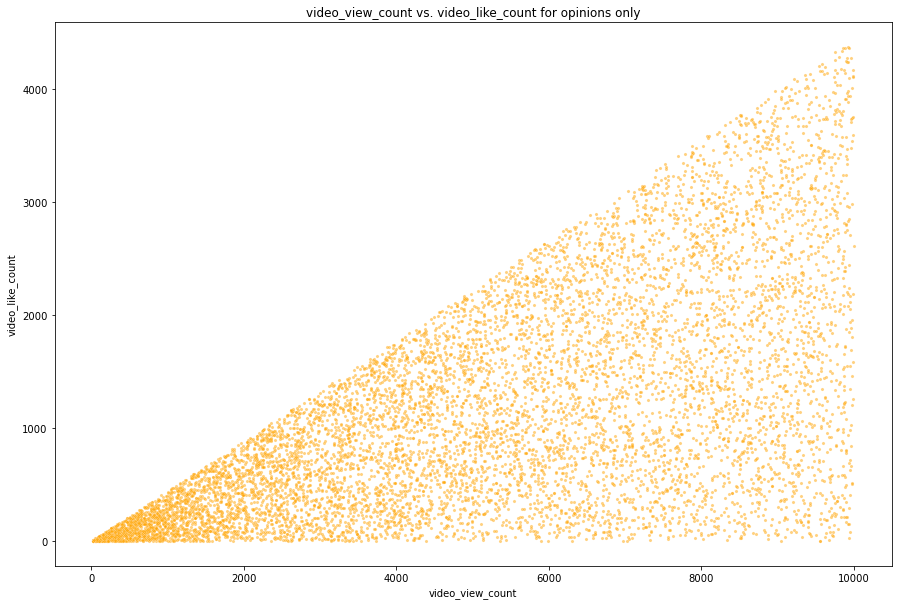

In [31]:
# Create a scatterplot of ``video_view_count` versus `video_like_count` for opinions only
opinion_only = data[data['claim_status'] == 'opinion']

plt.figure(figsize=(15, 10))
vvc_vlc = sns.scatterplot(
    x = opinion_only["video_view_count"],
    y = opinion_only["video_like_count"],
    s = 10,
    alpha = 0.5,
    color = 'orange'
    )
plt.title('video_view_count vs. video_like_count for opinions only')

plt.show()

You can do a scatterplot in Tableau Public as well, which can be easier to manipulate and present. If you'd like step by step instructions, you can review the instructions linked in the previous Activity page.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 5a. Results and evaluation**

Having built visualizations in Tableau and in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue?

***Pro tip:*** Put yourself in your client's perspective, what would they want to know?

Use the following code cells to pursue any additional EDA. Also use the space to make sure your visualizations are clean, easily understandable, and accessible.

***Ask yourself:*** Did you consider color, contrast, emphasis, and labeling?


I have learned ....
- how to examine distribution
- how to create boxplots to examine outliers
- how to create histograms to examine the counts of columns
- analyzed correlation between variables with scatterplots

My other questions are ....
- how to get better with analysis

My client would likely want to know ...
- if video_view_counts is really a good measure of claim_status for videos.

### **Task 5b. Conclusion**
*Make it professional and presentable*

You have visualized the data you need to share with the director now. Remember, the goal of a data visualization is for an audience member to glean the information on the chart in mere seconds.

*Questions to ask yourself for reflection:*
Why is it important to conduct Exploratory Data Analysis? What other visuals could you create?


EDA is important because ...

- It is used to discover the data, clean the data, find missing values, and take note of outliers.

Visualizations helped me understand ..

- What to consider before the next step, which could be building a model.


You’ve now completed a professional data visualization according to a business need. Well done! Be sure to save your work as a reference for later work in Tableau.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.